<a href="https://www.kaggle.com/code/samudra89/01-logistic-regression-heart-desease?scriptVersionId=141298763" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Heart Disease Prediction Using Logistic Regression

About 697,000 people die of heart disease in the United States every year–that's 1 in every 5 deaths. Coronary heart disease (CHD) is the most common type of heart disease, killing approximately 382,820 people annually. Spotting heart conditions early is really important. It can help people at high risk choose better ways of living and lower the chances of problems. In this work, I want to find out which factors are most responsible for heart disease. Also, I want to create a model to predict the overall risk of experiencing heart disease using logistic regression analysis. I used the following dataset for my analysis.

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

## Heart Disease Framingham dataset

The classification goal is to predict whether the patient has a 10-year risk of future CHD. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. 

#### Features (Variables)

* Sex: male or female(Nominal)
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: No further information is provided
* Current Smoker: whether or not the patient is a current smoker (Nominal)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, are considered continuous because of a large number of possible values.)
* Glucose: glucose level (Continuous)

#### Target variable to predict
10-year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
# load the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

import scipy.stats as st

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant as add_constant

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
data=pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
data.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [3]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
# explore different features
for col in data:
    print(col, ":" ,data[col].unique())

male : [1 0]
age : [39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
education : [ 4.  2.  1.  3. nan]
currentSmoker : [0 1]
cigsPerDay : [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BPMeds : [ 0.  1. nan]
prevalentStroke : [0 1]
prevalentHyp : [0 1]
diabetes : [0 1]
totChol : [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269.
 275. 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246.
 150. 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159. 174.
 242. 301. 167. 308. 325. 229. 236. 224. 253. 464. 171. 186. 

Once I got an overall idea about the features I checked for their values and tried to understand how each feature can contribute to the model. For instance, the feature column 'education' is a subjective feature, since it could be different opinions of different doctors. Then I filled some 'Na' values which make sense to convert to '0's. Finally, I looked at the missing value percentage of each feature so that I could either drop them or do some missing value imputation.

In [5]:
# remove the education colomn since it is subjective in the context
data=data.drop(['education'],axis=1)

In [6]:
# fill na with 0s
data["cigsPerDay"] = data["cigsPerDay"].fillna(0)
data["BPMeds"] = data["BPMeds"].fillna(0)

In [7]:
# check for other missing value propotions
(data.isnull().sum() / len(data)).sort_values(ascending=False)

glucose            0.091553
totChol            0.011798
BMI                0.004483
heartRate          0.000236
male               0.000000
age                0.000000
currentSmoker      0.000000
cigsPerDay         0.000000
BPMeds             0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

Since the total number of rows with missing values for each feature is less than 0.1%, the rows with missing values will be discarded in further analysis. 

## Exploratory Data Analysis

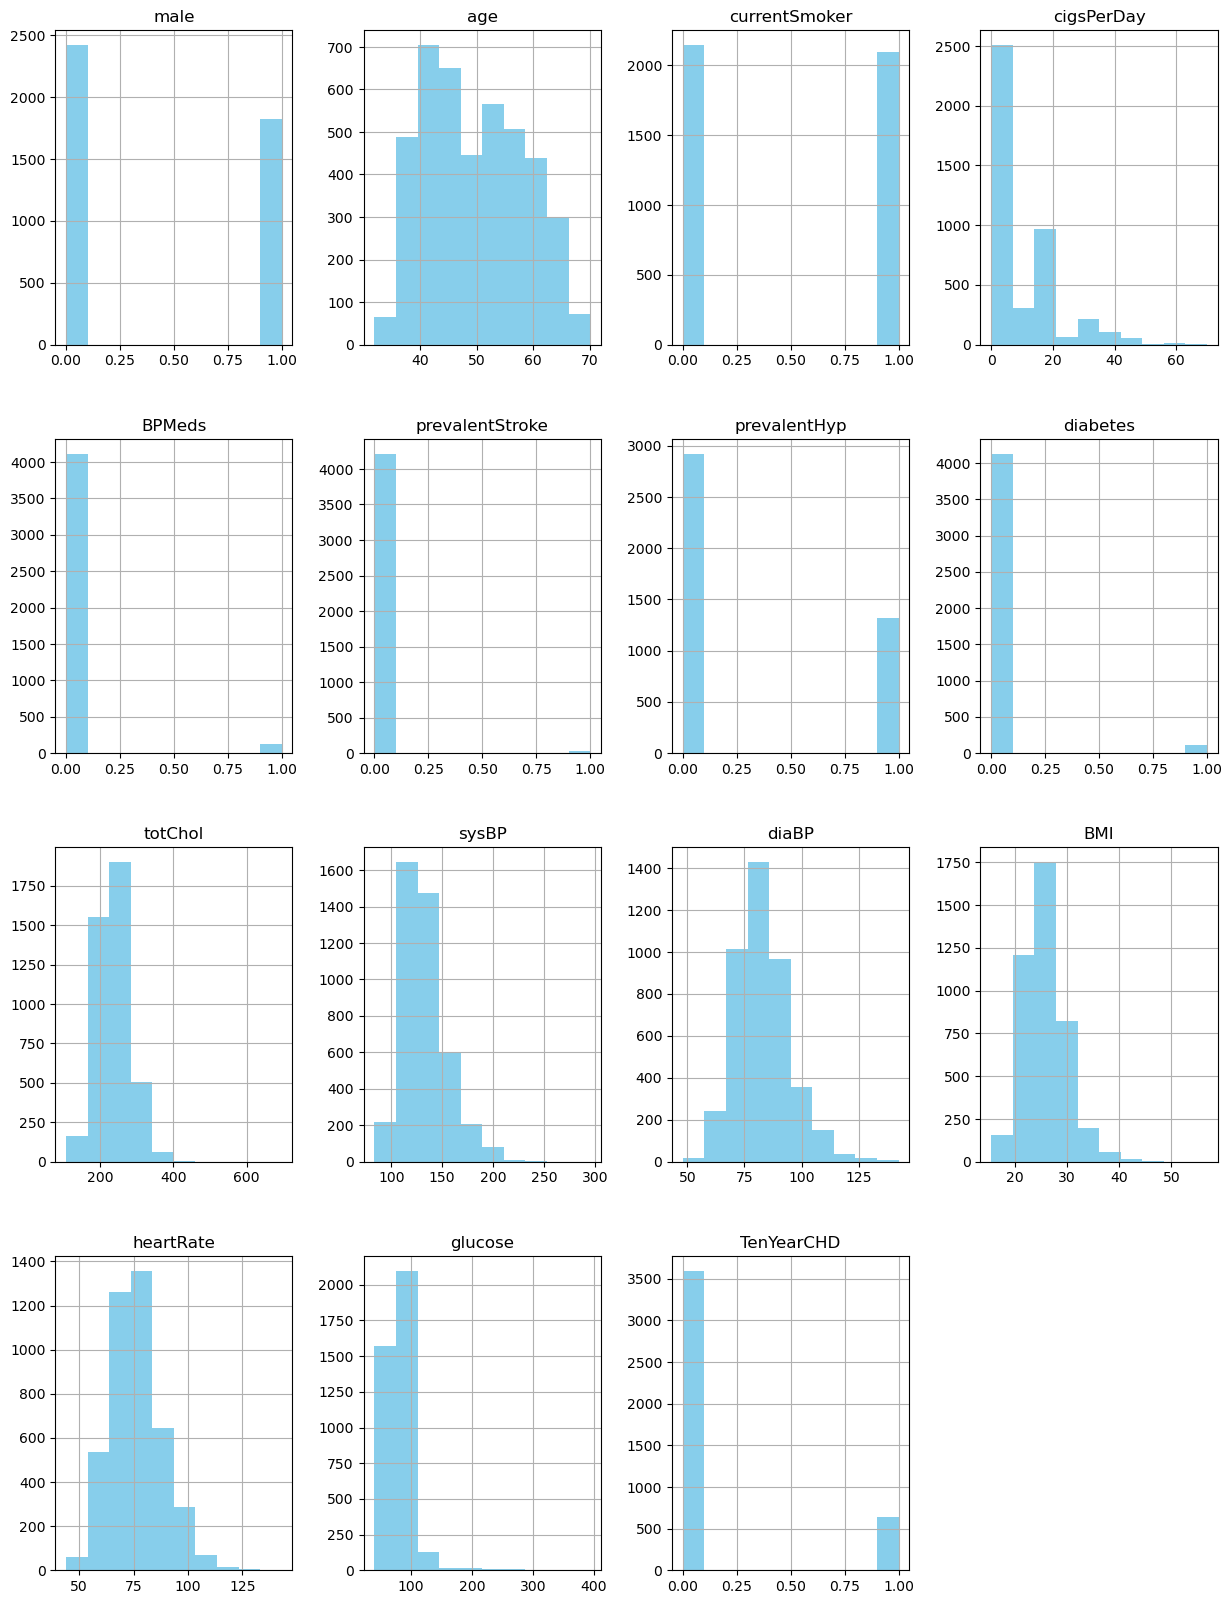

In [8]:
# distribution of each feature, Univariate analysis
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax=ax, color = "skyblue")
plt.show()

In [9]:
# drop the rows that contains missing values
input_df=data.dropna()
# input_df.isnull().sum()

In [10]:
input_df.TenYearCHD.value_counts()

0    3240
1     585
Name: TenYearCHD, dtype: int64

There are 3240 patents with no heart disease and 585 patients with risk of heart disease.

In [11]:
input_df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000
mean,0.443399,49.624837,0.490719,8.935686,0.029804,0.005752,0.312941,0.027190,237.051765,132.444444,82.954248,25.808536,75.731242,81.912941,0.152941
std,0.496851,8.573925,0.499979,11.911461,0.170068,0.075631,0.463751,0.162657,44.767203,22.079807,11.966196,4.067145,11.938823,23.759528,0.359978
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Feature Selection

As you can observe, this dataset contains numerous features. To streamline the process, I want to perform feature selection, aiming to identify the most important features of the model. Initially, I conducted a correlation analysis on the features within the dataset.

### Correlation analysis

Correlation between the predictors and the target variable. Usually, the default is to use Pearson Correlation for this analysis. It can only be applied to numerical features. However, the categorical data of the given dataset contains only 0, and 1 values and we can use them in the correlation analysis. 

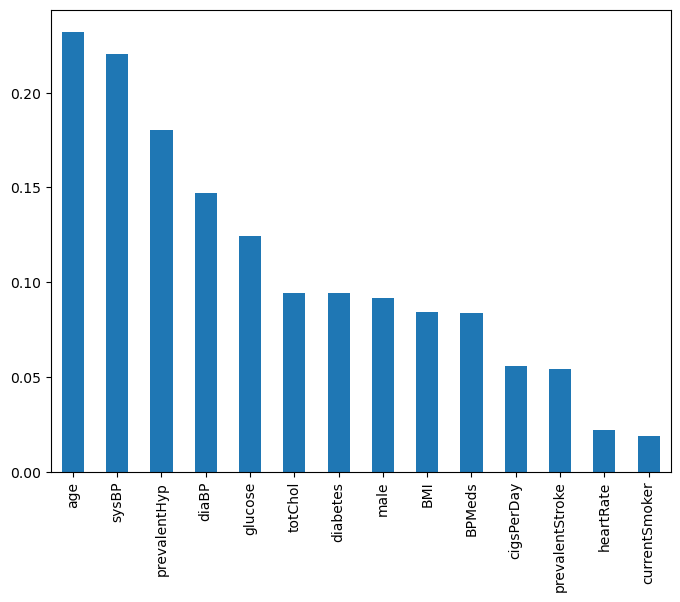

In [12]:
# check correlation between the target and the features
corr_with_tot_count = input_df.corr()["TenYearCHD"].sort_values(ascending=False)

plt.figure(figsize=(8,6))
corr_with_tot_count.drop("TenYearCHD").plot.bar()
plt.show()

In [13]:
corr_with_tot_count

TenYearCHD         1.000000
age                0.232279
sysBP              0.220388
prevalentHyp       0.180033
diaBP              0.147295
glucose            0.124164
totChol            0.094309
diabetes           0.094210
male               0.091545
BMI                0.084007
BPMeds             0.083571
cigsPerDay         0.055659
prevalentStroke    0.054128
heartRate          0.021736
currentSmoker      0.018786
Name: TenYearCHD, dtype: float64

When conducting a correlation analysis on a dataset, we examine how the target and the predictors relate to each other. This helps us figure out which features strongly influence the outcome we're trying to predict. If a feature is closely correlated with the target, it's valuable to include it when building the model.

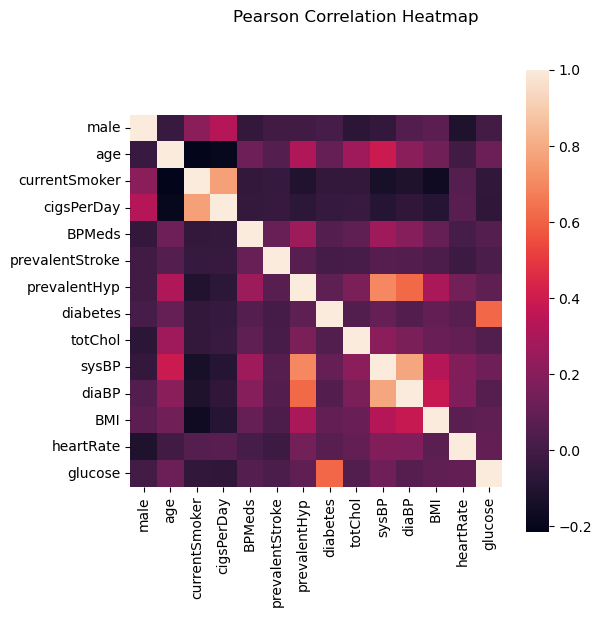

In [14]:
# check for correlation among the features

pd.set_option('precision',2)
plt.figure(figsize=(6,6))

sns.heatmap(input_df.drop(['TenYearCHD'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

The above person correlation heatmap tells us what features are highly correlated with each other. The values closer to 1 say the features are highly positively correlated and the values close to 0 say the features are highly negatively correlated.E.g., from the above map, features such as 'cigsPerDay', 'currentSmoker' seem highly correlated with a value of 0.76. So we can only consider one feature of these two.

In [15]:
# create correlation matrix
corr_matrix = input_df.drop(['TenYearCHD'],axis=1).corr().abs()

# select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# select one feature from the highly correlated features, threshold 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

print(to_drop)

['cigsPerDay', 'diaBP']


In [16]:
# drop the colomns that highly correlated with other features
data_df=input_df.drop(to_drop,axis=1)
data_df.head(3)

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0


### Logistic Regression Model

Logistic regression is a way to understand and predict binary outcomes, like whether something will happen or not. The model calculates the odds of a particular outcome, which helps us make informed choices about what's likely to occur.

The logistic regression model can be accessed using two widely used Python libraries: scikit-learn's linear model and statmodels.api. Typically, scikit-learn is tailored for predictive tasks, while statsmodels is better suited for exploring and explaining relationships. Initially, I will apply the logistic regression algorithm provided by statsmodels, so we can get a better explanatory analysis.

In [17]:
# add a constant value for the input data
data_df_constant = add_constant(data_df)
data_df_constant.head(3)

,const,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1.0,1,48,1,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0


In [18]:
# fitting the model using the statmodel logistic regression algorithm
st.chisqprob = lambda chisq, data_df: st.chi2.sf(chisq, data_df)
cols = data_df_constant.columns[:-1]
model = sm.Logit(data_df.TenYearCHD, data_df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378957
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3825
Model:                          Logit   Df Residuals:                     3812
Method:                           MLE   Df Model:                           12
Date:                Tue, 29 Aug 2023   Pseudo R-squ.:                  0.1141
Time:                        00:53:22   Log-Likelihood:                -1449.5
converged:                       True   LL-Null:                       -1636.2
Covariance Type:            nonrobust   LLR p-value:                 1.547e-72
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8543      0.648    -13.666      0.000     -10.124      -7.584
male                0.6308      0.102      6.206      0.000       0.432       0.830
age                 0.0633      0.006     10.068      0.000       0.051       0.076
currentSmoker       0.4040      0.103      3.911      0.000       0.202       0.606
BPMeds              0.1317      0.232      0.569      0.569      -0.322       0.585
prevalentStroke     0.7998      0.472      1.695      0.090      -0.125       1.725
prevalentHyp        0.2062      0.133      1.545      0.122      -0.055       0.468
diabetes            0.0391      0.306      0.128      0.898      -0.561       0.639
totChol             0.0026      0.001      2.481      0.013       0.001       0.005
sysBP               0.0138      0.003      4.813      0.000       0.008       0.019
BMI                 0.0101      0.012      0.835      0.404      -0.014       0.034
heartRate          -0.0018      0.004     -0.441      0.659      -0.010       0.006
glucose             0.0073      0.002      3.334      0.001       0.003       0.012
===================================================================================
"""

Following the results of the initial model fitting we can see that for some of the features the Z value is larger than 0.05, meaning those features have less significant relation with the probability of CHD. Hence, we can further reduce the features and select only a subset of these features.


### Backward feature selection


Backward feature elimination starts with a model that includes all available features and systematically removes the least significant ones based on their statistical importance (using p-value). In each step, the feature with the highest p-value is removed, and the model is re-evaluated. This is an iterative process until a desired level of performance is achieved. It helps us to discover the most important features by removing irrelevant or redundant features.

For more details see: https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4

In [19]:
# backward features selection, dropping the least significant features in each iteation
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)


result = back_feature_elem(data_df_constant, data_df.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3825
Model:                          Logit   Df Residuals:                     3818
Method:                           MLE   Df Model:                            6
Date:                Tue, 29 Aug 2023   Pseudo R-squ.:                  0.1119
Time:                        00:53:23   Log-Likelihood:                -1453.2
converged:                       True   LL-Null:                       -1636.2
Covariance Type:            nonrobust   LLR p-value:                 5.348e-76
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.1812      0.468    -19.629      0.000     -10.098      -8.264
male              0.6455      0.101      6.418      0.000       0.448       0.843
age               0.0639      0.006     10.249      0.000       0.052       0.076
currentSmoker     0.3759      0.101      3.709      0.000       0.177       0.575
totChol           0.0027      0.001      2.519      0.012       0.001       0.005
sysBP             0.0175      0.002      8.329      0.000       0.013       0.022
glucose           0.0075      0.002      4.546      0.000       0.004       0.011
=================================================================================
"""

Now, lets see how we can obtained the Logistic Regression Equation for our model using the above selected features.

${P} = \frac{{e}^{\beta + {\beta}{X_1}}}{{1} + {e}^{\beta + {\beta}{X_1}}} $

${logit(P)} = {\log}\frac{P}{(1-P)} $

${logit(P)} = {\beta_0} + {\beta_1} * male + {\beta_2} * age+ {\beta_3} * currentSmoker +{\beta_4} * totChol +{\beta_5} * sysBP +{\beta_6} * glucose $

Next, I am going to look at the  interpretation of the Odds Ratio, Confidence Intervals and P-values provided by the model results.

In [20]:
# returns the odds ration, CIs and p-values
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

               CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const              4.12e-05       2.58e-04    1.03e-04    0.00
male               1.57e+00       2.32e+00    1.91e+00    0.00
age                1.05e+00       1.08e+00    1.07e+00    0.00
currentSmoker      1.19e+00       1.78e+00    1.46e+00    0.00
totChol            1.00e+00       1.00e+00    1.00e+00    0.01
sysBP              1.01e+00       1.02e+00    1.02e+00    0.00
glucose            1.00e+00       1.01e+00    1.01e+00    0.00


Now let's try to interpret few results.
1. The odds for male getting diagnosed with CHD is 91% higher than the odds for females.
2. The odds of increase in one year of age and getting diagnosed with CHD is around 7%.
3. Current smoker has 46% higher odds of getting CHD than a non-smoker.

## Model Training

In [21]:
# returns the prediction results
def model_training(training_data,testing_data, tr_size):
    
    x_train, x_test, y_train, y_test = train_test_split(training_data,testing_data,train_size=tr_size,random_state=3)

    model = LogisticRegression(random_state=0).fit(x_train, y_train)

    y_pred = model.predict(x_test)
    
    return model, y_pred, y_test, x_test


In [22]:
# train the model with the selected features
new_features_df =  data_df[['age','male','currentSmoker','totChol','sysBP','glucose','TenYearCHD']]
training_data= new_features_df.iloc[:,:-1]
testing_data= new_features_df.iloc[:,-1]

model, y_pred, y_test, x_test = model_training(training_data,testing_data, 0.8)

## Model Evaluation

For model evaluation, I have used metrics such as accuracy, precision, recall and F1- measures. 
Given, TP= True positives, FP= False positives , TN = True Negatives and FN = False Negatives, the definitions are as follows.
1. $Precision = \frac{TP}{TP + FP} $
2. $Recall = \frac{TP}{TP + FN} $
3. $Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$
4. $F1 = \frac{Precision * Recall}{Precision + Recall}$

In [23]:
# return the model performace results, confusion matrix, classification report, and the ROC curve
def model_performance(model, y_test, x_test, y_pred):
    
    print("Classification report")
    print(classification_report(y_test,y_pred))
    
    
    cnf_matrix_log = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix Logistic Regression\n', y=1.1)
    
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    

In [24]:
# calculate the accruacy of the model
accuracy_score(y_test,y_pred)

0.8496732026143791

Classification report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       652
           1       0.44      0.06      0.11       113

    accuracy                           0.85       765
   macro avg       0.65      0.52      0.51       765
weighted avg       0.80      0.85      0.80       765



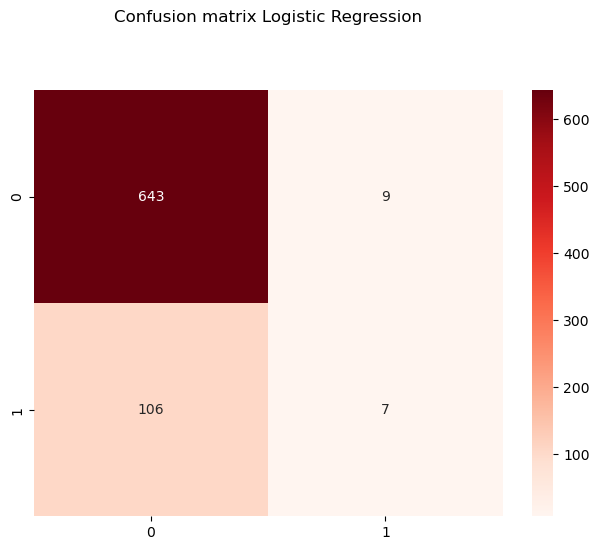

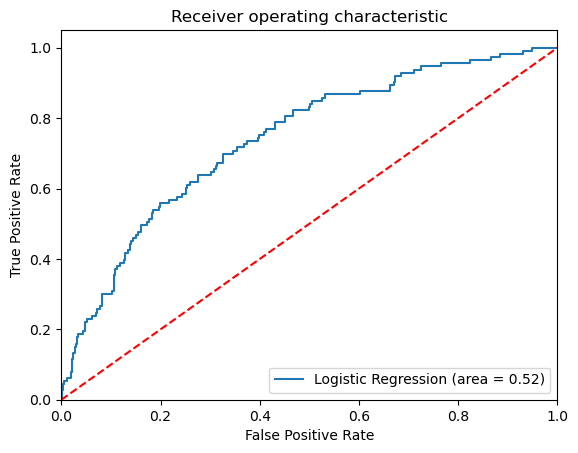

In [25]:
# check other metrics
model_performance(model, y_test, x_test, y_pred)

In [26]:
roc_auc_score(y_test,y_pred)

0.5240716108366361

### Conclusions

Analyzing the confusion matrix shows that the model produces 9 False Positives (Type I errors), indicating records incorrectly identified as having CHD risk when they don't. 
There are 106 False Negatives (Type II errors), where the model falsely predicts no CHD risk for cases that actually have a risk. 
This model prioritizes specificity, which can be problematic as having a large number of False Negatives can be dangerous, missing actual risks of CHD.

With the ROC curve, a strong model shows more true positives than false positives across various thresholds. The optimal ROC curve position is the upper-left corner, indicating an optimal True Positive Rate. 

The area under the ROC curve (AUC) quantifies classification accuracy. An AUC of 0.5 signifies random performance, while closer to 1 signifies a good classification. Our current model's AUC is approximately 0.52, indicating room for improvement. Evaluating these metrics collectively suggests the need for enhancing the model's performance.